In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
import re

In [2]:
# get current path
folder_path = os.getcwd()

# get all excel files under the path
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') or f.endswith('.xls')]

merged_df = pd.DataFrame()

# read in all the excel files
for i, file in enumerate(excel_files):
    suffix = str(i)
    file_path = os.path.join(folder_path, file)

    df = pd.read_excel(file_path)

    # set columns name
    df.columns = ['Price'+suffix, 'Changes (SGD)'+suffix, 'Changes (%)'+suffix, 'Date']
    print(file_path)
    # merge data according to the date
    if merged_df.empty:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='Date', how='outer')

# num = i+1
num = len(excel_files)

# convert date to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# order by date descending
merged_df = merged_df.sort_values(by='Date')

merged_df



/Users/ukrys/coding/BMD5302/BMD5302-Robot-Adviser/stock_data/GS US CORE EQUITY PORTFOLIO ACC USD.xlsx
/Users/ukrys/coding/BMD5302/BMD5302-Robot-Adviser/stock_data/NIKKO AM SHENTON JAPAN FUND SGD.xlsx
/Users/ukrys/coding/BMD5302/BMD5302-Robot-Adviser/stock_data/JPMORGAN FUNDS - AMERICA EQUITY A (ACC) USD.xlsx
/Users/ukrys/coding/BMD5302/BMD5302-Robot-Adviser/stock_data/FIDELITY GLOBAL FINANCIAL SERVICES A-ACC-SGD Daily Prices (Since Inception Price History).xlsx
/Users/ukrys/coding/BMD5302/BMD5302-Robot-Adviser/stock_data/NIKKO AM SHENTON THRIFT FUND SGD.xlsx
/Users/ukrys/coding/BMD5302/BMD5302-Robot-Adviser/stock_data/JANUS HENDERSON HORIZON GLOBAL TECHNOLOGY LEADERS A2 SGD.xlsx
/Users/ukrys/coding/BMD5302/BMD5302-Robot-Adviser/stock_data/NATIXIS HARRIS ASSOCIATES US VALUE EQUITY RA USD.xlsx
/Users/ukrys/coding/BMD5302/BMD5302-Robot-Adviser/stock_data/UNITED SINGAPORE GROWTH FUND SGD.xlsx
/Users/ukrys/coding/BMD5302/BMD5302-Robot-Adviser/stock_data/FTGF CLEARBRIDGE INFRASTRUCTURE VALUE

,Price0,Changes (SGD)0,Changes (%)0,Date,Price1,Changes (SGD)1,Changes (%)1,Price2,Changes (SGD)2,Changes (%)2,...,Changes (%)6,Price7,Changes (SGD)7,Changes (%)7,Price8,Changes (SGD)8,Changes (%)8,Price9,Changes (SGD)9,Changes (%)9
670,NaN,NaN,NaN,2001-07-04,NaN,NaN,NaN,NaN,NaN,NaN,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,NaN,NaN,NaN,2001-07-05,NaN,NaN,NaN,NaN,NaN,NaN,...,1.78%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,NaN,NaN,NaN,2001-07-06,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.52%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1690,NaN,NaN,NaN,2001-07-09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,NaN,NaN,NaN,2001-07-10,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.63%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,44.02,-2.48,-5.33%,2025-04-03,1.8590,-0.0279,-1.48%,55.95,-1.51,-2.63%,...,-5.52%,4.4330,-0.0058,-0.13%,NaN,NaN,NaN,56.21,-2.520,-4.29%
602,41.39,-2.63,-5.97%,2025-04-04,1.7984,-0.0606,-3.26%,NaN,NaN,NaN,...,-6.27%,4.3096,-0.1234,-2.78%,NaN,NaN,NaN,53.21,-3.000,-5.34%
1213,41.35,-0.04,-0.10%,2025-04-07,1.6482,-0.1502,-8.35%,51.22,-4.73,-8.45%,...,-0.62%,4.0084,-0.3012,-6.99%,NaN,NaN,NaN,51.26,-1.950,-3.66%
1419,40.66,-0.69,-1.67%,2025-04-08,1.7510,0.1028,6.24%,54.06,2.84,5.54%,...,-1.74%,3.9515,-0.0569,-1.42%,NaN,NaN,NaN,52.55,1.290,2.52%


In [3]:
# count missing value
merged_df.isnull().sum()

Price0            1454
Changes (SGD)0    1454
Changes (%)0      1454
Date                 0
Price1            1315
Changes (SGD)1    1315
Changes (%)1      1315
Price2            1194
Changes (SGD)2    1194
Changes (%)2      1194
Price3            3832
Changes (SGD)3    3832
Changes (%)3      3832
Price4            1108
Changes (SGD)4    1108
Changes (%)4      1108
Price5            3922
Changes (SGD)5    3922
Changes (%)5      3922
Price6             217
Changes (SGD)6     217
Changes (%)6       217
Price7            1111
Changes (SGD)7    1111
Changes (%)7      1111
Price8            4206
Changes (SGD)8    4206
Changes (%)8      4206
Price9            3338
Changes (SGD)9    3338
Changes (%)9      3338
dtype: int64

In [4]:
# drop missing value
merged_df.replace('-', float('nan'), inplace=True)
df = merged_df.dropna(how='any')
df = df.reset_index(drop=True)

In [5]:
df

,Price0,Changes (SGD)0,Changes (%)0,Date,Price1,Changes (SGD)1,Changes (%)1,Price2,Changes (SGD)2,Changes (%)2,...,Changes (%)6,Price7,Changes (SGD)7,Changes (%)7,Price8,Changes (SGD)8,Changes (%)8,Price9,Changes (SGD)9,Changes (%)9
0,20.00,0.04,0.20%,2017-06-07,1.1880,0.0030,0.25%,22.37,0.04,0.18%,...,0.18%,3.4420,-0.0010,-0.03%,0.996,0.002,0.20%,17.05,-0.060,-0.35%
1,20.01,0.01,0.05%,2017-06-08,1.1790,-0.0090,-0.76%,22.37,0.00,0.00%,...,0.00%,3.4470,0.0050,0.15%,0.995,-0.001,-0.10%,17.11,0.060,0.35%
2,19.96,-0.05,-0.25%,2017-06-09,1.1800,0.0010,0.08%,22.51,0.14,0.63%,...,0.07%,3.4700,0.0230,0.67%,0.991,-0.004,-0.40%,17.14,0.030,0.18%
3,19.93,-0.03,-0.15%,2017-06-12,1.1900,0.0100,0.85%,22.18,-0.33,-1.47%,...,0.19%,3.4620,-0.0080,-0.23%,0.988,-0.003,-0.30%,16.67,-0.470,-2.74%
4,20.04,0.11,0.55%,2017-06-13,1.1870,-0.0030,-0.25%,22.36,0.18,0.81%,...,0.55%,3.4750,0.0130,0.38%,0.993,0.005,0.51%,16.79,0.120,0.72%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,46.05,-0.50,-1.07%,2025-03-18,1.9459,0.0125,0.65%,57.30,-0.31,-0.54%,...,-0.09%,4.3689,0.0369,0.85%,1.082,-0.002,-0.18%,60.42,-0.290,-0.48%
1701,46.59,0.54,1.17%,2025-03-19,1.9526,0.0067,0.34%,57.56,0.26,0.45%,...,0.87%,4.3863,0.0174,0.40%,1.088,0.006,0.55%,60.69,0.270,0.45%
1702,46.55,0.08,0.17%,2025-03-21,1.9753,0.0227,1.16%,57.59,-0.74,-1.27%,...,-0.27%,4.4169,-0.0112,-0.25%,1.095,-0.002,-0.18%,60.20,-0.320,-0.53%
1703,47.45,0.90,1.93%,2025-03-24,1.9513,-0.0240,-1.22%,58.82,1.23,2.14%,...,1.51%,4.4196,0.0027,0.06%,1.097,0.002,0.18%,60.77,0.570,0.95%


In [6]:
# check data type, notice 'changes' are represented in object(string) not float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Price0          1705 non-null   float64       
 1   Changes (SGD)0  1705 non-null   object        
 2   Changes (%)0    1705 non-null   object        
 3   Date            1705 non-null   datetime64[ns]
 4   Price1          1705 non-null   float64       
 5   Changes (SGD)1  1705 non-null   object        
 6   Changes (%)1    1705 non-null   object        
 7   Price2          1705 non-null   float64       
 8   Changes (SGD)2  1705 non-null   object        
 9   Changes (%)2    1705 non-null   object        
 10  Price3          1705 non-null   float64       
 11  Changes (SGD)3  1705 non-null   object        
 12  Changes (%)3    1705 non-null   object        
 13  Price4          1705 non-null   float64       
 14  Changes (SGD)4  1705 non-null   object        
 15  Chan

In [7]:
# get all changes(%) columns
changes_columns = [f'Changes (%){i}' for i in range(num)]  # fund columns: Changes (%)0, Changes (%)1, ..., Changes (%)9

# convert string to float
for col in changes_columns:
  df[col] = df[col].str.replace('%', '').astype(float) / 100

In [8]:
# get all returns
returns_df = df[changes_columns]

new_column_names = []
for file in excel_files:
    # delete unnecessary part
    clean_name = re.sub(r"\s*\(.*\)", "", file)
    clean_name = clean_name.replace(".xlsx", "")
    new_column_names.append(clean_name)

# rename columns
returns_df.columns = new_column_names

returns_df

,GS US CORE EQUITY PORTFOLIO ACC USD,NIKKO AM SHENTON JAPAN FUND SGD,JPMORGAN FUNDS - AMERICA EQUITY A USD,FIDELITY GLOBAL FINANCIAL SERVICES A-ACC-SGD Daily Prices,NIKKO AM SHENTON THRIFT FUND SGD,JANUS HENDERSON HORIZON GLOBAL TECHNOLOGY LEADERS A2 SGD,NATIXIS HARRIS ASSOCIATES US VALUE EQUITY RA USD,UNITED SINGAPORE GROWTH FUND SGD,FTGF CLEARBRIDGE INFRASTRUCTURE VALUE A MDIS SGD-H PLUS Daily Prices,FIDELITY GLOBAL TECHNOLOGY A-ACC-USD
0,0.0020,0.0025,0.0018,0.0055,-0.0022,0.0001,0.0018,-0.0003,0.0020,-0.0035
1,0.0005,-0.0076,0.0000,0.0055,0.0036,0.0042,0.0000,0.0015,-0.0010,0.0035
2,-0.0025,0.0008,0.0063,0.0085,0.0044,0.0073,0.0007,0.0067,-0.0040,0.0018
3,-0.0015,0.0085,-0.0147,-0.0046,-0.0097,-0.0517,0.0019,-0.0023,-0.0030,-0.0274
4,0.0055,-0.0025,0.0081,0.0062,0.0049,0.0226,0.0055,0.0038,0.0051,0.0072
...,...,...,...,...,...,...,...,...,...,...
1700,-0.0107,0.0065,-0.0054,0.0045,0.0080,-0.0102,-0.0009,0.0085,-0.0018,-0.0048
1701,0.0117,0.0034,0.0045,0.0098,0.0051,0.0092,0.0087,0.0040,0.0055,0.0045
1702,0.0017,0.0116,-0.0127,0.0000,-0.0023,-0.0170,-0.0027,-0.0025,-0.0018,-0.0053
1703,0.0193,-0.0122,0.0214,0.0144,-0.0003,0.0280,0.0151,0.0006,0.0018,0.0095


In [9]:
# calculate average return for each fund
avgret_daily = returns_df.mean()

In [10]:
# calculate variance covariance matrix
varcov_daily = returns_df.cov()
varcov_daily

,GS US CORE EQUITY PORTFOLIO ACC USD,NIKKO AM SHENTON JAPAN FUND SGD,JPMORGAN FUNDS - AMERICA EQUITY A USD,FIDELITY GLOBAL FINANCIAL SERVICES A-ACC-SGD Daily Prices,NIKKO AM SHENTON THRIFT FUND SGD,JANUS HENDERSON HORIZON GLOBAL TECHNOLOGY LEADERS A2 SGD,NATIXIS HARRIS ASSOCIATES US VALUE EQUITY RA USD,UNITED SINGAPORE GROWTH FUND SGD,FTGF CLEARBRIDGE INFRASTRUCTURE VALUE A MDIS SGD-H PLUS Daily Prices,FIDELITY GLOBAL TECHNOLOGY A-ACC-USD
GS US CORE EQUITY PORTFOLIO ACC USD,0.000159,0.000017,0.000060,0.000083,0.000031,0.000069,0.000154,0.000028,0.000094,0.000097
NIKKO AM SHENTON JAPAN FUND SGD,0.000017,0.000122,0.000038,0.000028,0.000040,0.000044,0.000020,0.000041,0.000015,0.000034
JPMORGAN FUNDS - AMERICA EQUITY A USD,0.000060,0.000038,0.000132,0.000093,0.000048,0.000129,0.000069,0.000048,0.000044,0.000103
FIDELITY GLOBAL FINANCIAL SERVICES A-ACC-SGD Daily Prices,0.000083,0.000028,0.000093,0.000134,0.000043,0.000084,0.000104,0.000044,0.000065,0.000107
NIKKO AM SHENTON THRIFT FUND SGD,0.000031,0.000040,0.000048,0.000043,0.000069,0.000051,0.000036,0.000067,0.000027,0.000045
JANUS HENDERSON HORIZON GLOBAL TECHNOLOGY LEADERS A2 SGD,0.000069,0.000044,0.000129,0.000084,0.000051,0.000175,0.000067,0.000049,0.000036,0.000118
NATIXIS HARRIS ASSOCIATES US VALUE EQUITY RA USD,0.000154,0.000020,0.000069,0.000104,0.000036,0.000067,0.000178,0.000034,0.000102,0.000104
UNITED SINGAPORE GROWTH FUND SGD,0.000028,0.000041,0.000048,0.000044,0.000067,0.000049,0.000034,0.000074,0.000026,0.000044
FTGF CLEARBRIDGE INFRASTRUCTURE VALUE A MDIS SGD-H PLUS Daily Prices,0.000094,0.000015,0.000044,0.000065,0.000027,0.000036,0.000102,0.000026,0.000109,0.000056
FIDELITY GLOBAL TECHNOLOGY A-ACC-USD,0.000097,0.000034,0.000103,0.000107,0.000045,0.000118,0.000104,0.000044,0.000056,0.000155


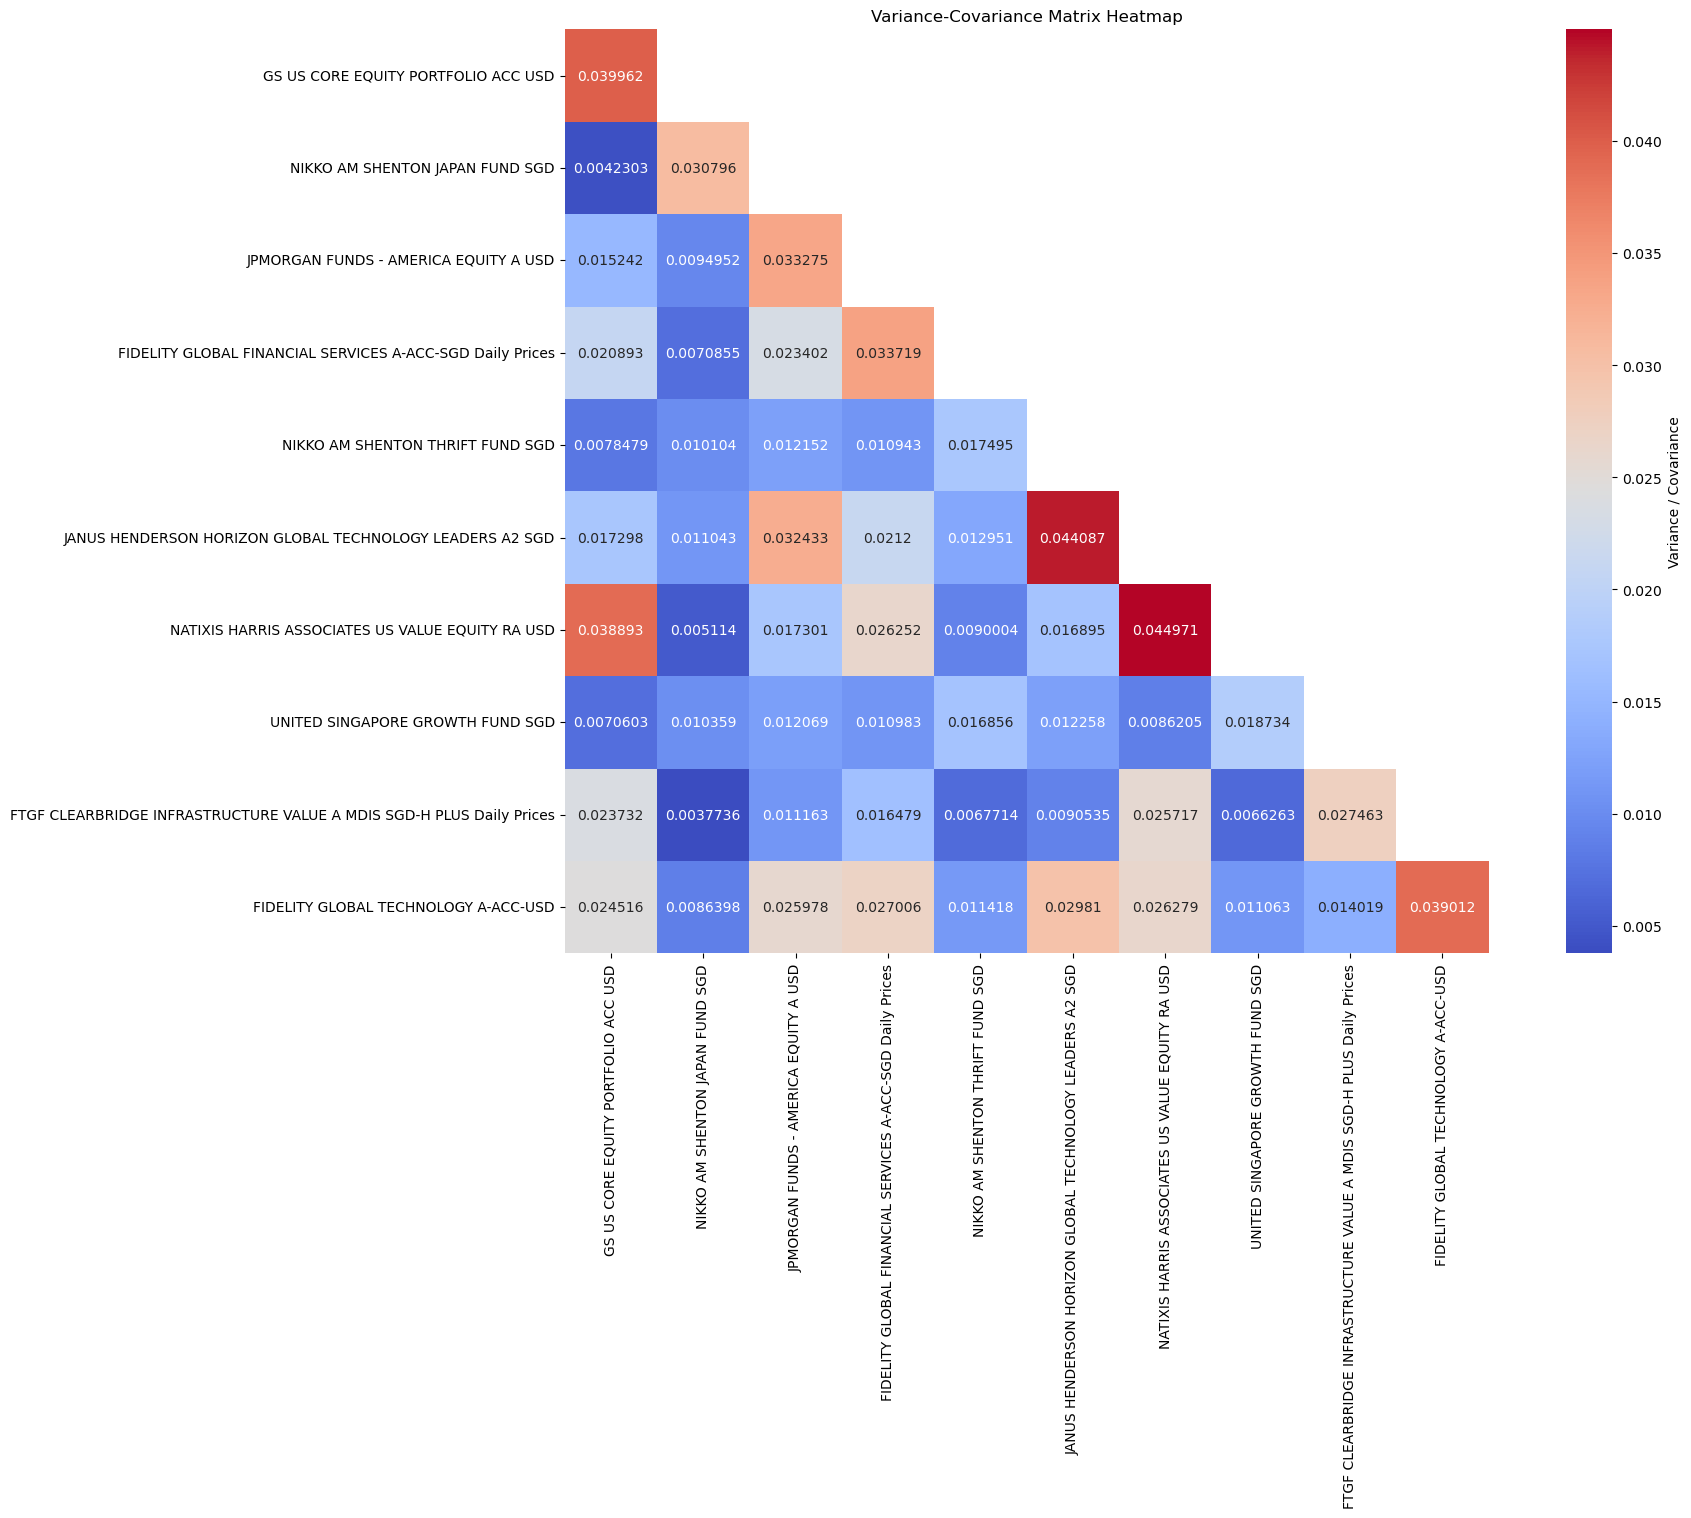

In [23]:
TRADING_DAYS = 252

avgret_annualized = avgret_daily * TRADING_DAYS
varcov_annualized = varcov_daily * TRADING_DAYS

# plot the heatmap of varcov_annualized
# create a mask
mask = np.triu(np.ones_like(varcov_annualized, dtype=bool), k=1)

# draw the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(varcov_annualized, annot=True, fmt='.5g', cmap='coolwarm', mask=mask, 
            cbar_kws={'label': 'Variance / Covariance'}, square=True)
plt.title("Variance-Covariance Matrix Heatmap")
plt.savefig('Variance-Covariance Matrix Heatmap.pdf', format='pdf')
plt.show()

In [12]:
# convert df to 2d array
varcov_annualized_array = varcov_annualized.to_numpy()

In [13]:
# calculate retrun, variance and standard deviation of portfolio
def portfolioCalculate(weights, avgret_annualized, varcov_annualized_array):
    portfolio_ret = np.dot(weights, avgret_annualized)
    portfolio_var = np.dot(weights.T, np.dot(varcov_annualized_array, weights))
    portfolio_std = np.sqrt(portfolio_var)
    return portfolio_ret, portfolio_std

In [14]:
# GMVP with short sales
ones = np.ones(len(varcov_annualized_array))
inverse_varcov = np.linalg.inv(varcov_annualized_array)
gmvp_weights = np.dot(inverse_varcov, ones) / np.dot(ones.T, np.dot(inverse_varcov, ones))
gmvp_return, gmvp_volatility = portfolioCalculate(gmvp_weights, avgret_annualized, varcov_annualized_array)

print("GMVP with short sales:")
print(f"weights: {gmvp_weights}")
print(f"return: {gmvp_return}")
print(f"volatility: {gmvp_volatility}")

GMVP with short sales:
weights: [ 0.22989778  0.20139668  0.05875849  0.06788748  0.30179546 -0.02805733
 -0.25760901  0.13283041  0.29490112 -0.00180109]
return: 0.061686995682102966
volatility: 0.11004193428194704


/var/folders/l7/d0lb4fb15qx7kr983gqvzs2c0000gn/T/ipykernel_68971/386137575.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(fund_volatility, avgret_annualized[i], marker='o', s=100, label='Fund' if i == 0 else "")


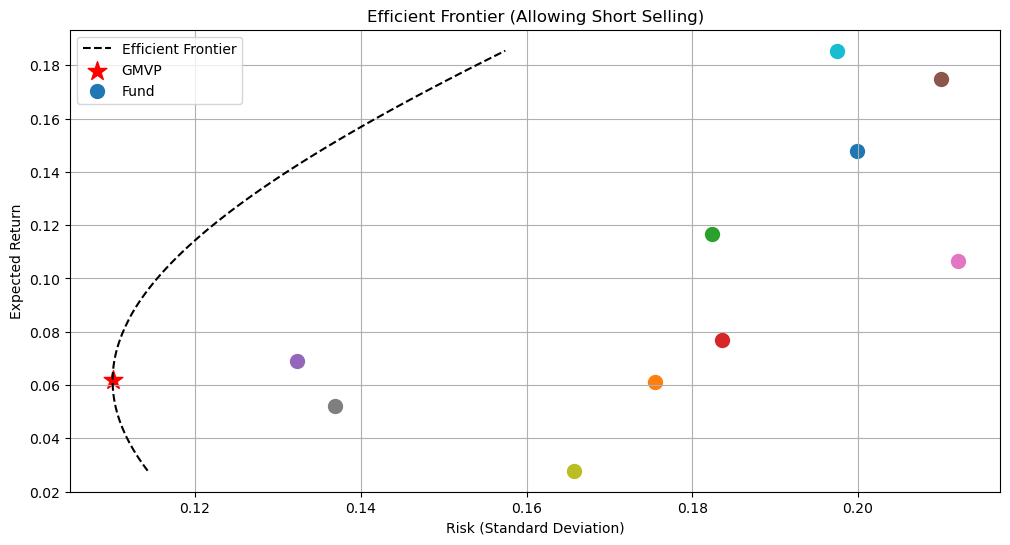

In [15]:
# graph with short sales

# get number of funds(10)
n = len(avgret_annualized)

# portfolio standard deviation function
def portfolio_risk(weights, varcov_annualized_array):
    return np.sqrt(np.dot(weights.T, np.dot(varcov_annualized_array, weights)))

# portfolio return function
def portfolio_return(weights,avgret_annualized):
    return np.dot(weights.T, avgret_annualized)

# target function: minimize risk
def min_risk(weights,avgret_annualized, varcov_annualized_array,target_return):
    return portfolio_risk(weights, varcov_annualized_array)

# set range of return for the efficient frontier
target_returns = np.linspace(min(avgret_annualized), max(avgret_annualized), 100)
portfolio_risks = []

for target_return in target_returns:
    # set constraints
    constraints = ({'type': 'eq', 'fun': lambda weights: portfolio_return(weights, avgret_annualized) - target_return},
                   {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # sum of weights = 1

    # initial weights
    initial_guess = np.ones(n) / n

    # optimization
    result = minimize(min_risk, initial_guess, args=(avgret_annualized, varcov_annualized_array, target_return), constraints=constraints)

    # store results
    portfolio_risks.append(result.fun)

# set figure size
plt.figure(figsize=(12, 6))
# draw ef
plt.plot(portfolio_risks, target_returns, label='Efficient Frontier', linestyle='--', color='black')

# draw GMVP
plt.scatter(gmvp_volatility, gmvp_return, color='red', marker='*', s=200, label='GMVP')

# draw points of funss
for i in range(len(avgret_annualized)):
    fund_volatility = np.sqrt(varcov_annualized_array[i, i])
    plt.scatter(fund_volatility, avgret_annualized[i], marker='o', s=100, label='Fund' if i == 0 else "")

# set title and labels
plt.title('Efficient Frontier (Allowing Short Selling)')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/l7/d0lb4fb15qx7kr983gqvzs2c0000gn/T/ipykernel_68971/23114925.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(varcov_annualized_array[i, i] ** 0.5, avgret_annualized[i], label=i, s=50, marker='o')


GMVP with short sales:
weights: OrderedDict({'GS US CORE EQUITY PORTFOLIO ACC USD': 0.2299, 'NIKKO AM SHENTON JAPAN FUND SGD': 0.2014, 'JPMORGAN FUNDS - AMERICA EQUITY A USD': 0.05876, 'FIDELITY GLOBAL FINANCIAL SERVICES A-ACC-SGD Daily Prices': 0.06789, 'NIKKO AM SHENTON THRIFT FUND SGD': 0.3018, 'JANUS HENDERSON HORIZON GLOBAL TECHNOLOGY LEADERS A2 SGD': -0.02806, 'NATIXIS HARRIS ASSOCIATES US VALUE EQUITY RA USD': -0.25761, 'UNITED SINGAPORE GROWTH FUND SGD': 0.13283, 'FTGF CLEARBRIDGE INFRASTRUCTURE VALUE A MDIS SGD-H PLUS Daily Prices': 0.2949, 'FIDELITY GLOBAL TECHNOLOGY A-ACC-USD': -0.0018})
return: 0.06168699568210301
volatility: 0.11004193428194704



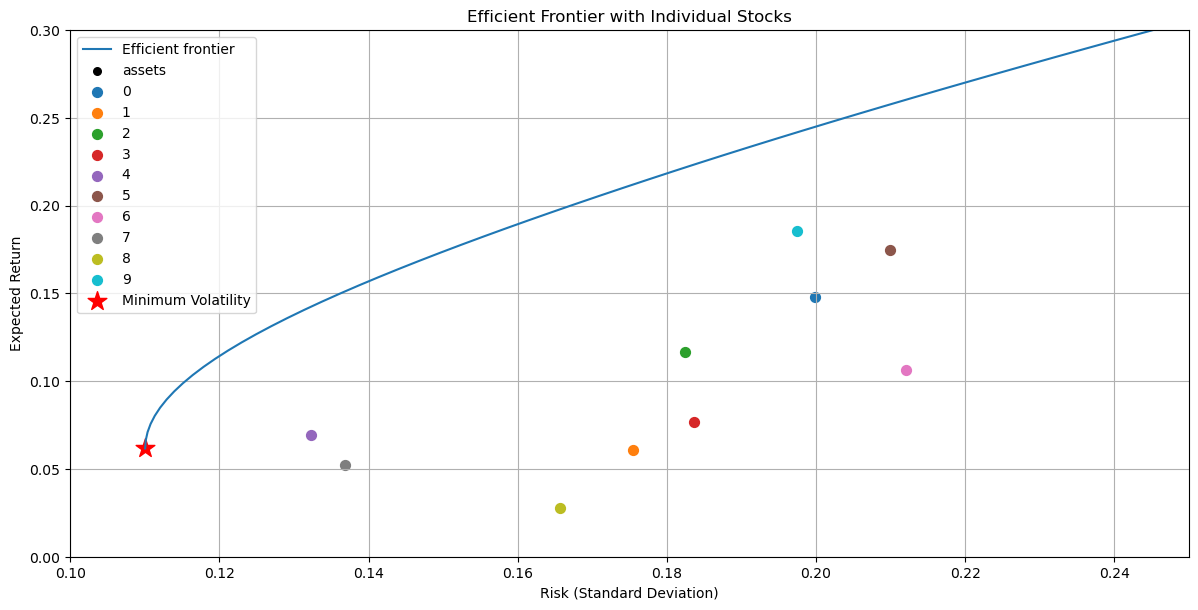

In [16]:
# another edition of graph with short sale

# initialize efficient frontier
ef_w = EfficientFrontier(avgret_annualized, varcov_annualized_array,weight_bounds=(None,None))

# calculate GMPV
ef_w.min_volatility()
gmpv_weights_w = ef_w.clean_weights()
gmpv_return_w, gmpv_volatility_w, _ = ef_w.portfolio_performance()
print("GMVP with short sales:")
print(f"weights: {gmpv_weights_w}")
print(f"return: {gmpv_return_w}")
print(f"volatility: {gmpv_volatility_w}\n")


# initialize efficient frontier
ef_w = EfficientFrontier(avgret_annualized, varcov_annualized_array, weight_bounds=(None,None))

# set figure size
fig, ax = plt.subplots(figsize=(12, 6))

# draw ef
plotting.plot_efficient_frontier(ef_w, ax=ax, show_assets=True)

# draw fund points
for i in range(n):
    ax.scatter(varcov_annualized_array[i, i] ** 0.5, avgret_annualized[i], label=i, s=50, marker='o')

# draw GMVP
ax.scatter(gmpv_volatility_w, gmpv_return_w, color='red', label='Minimum Volatility',marker='*', s=200)

# add title and labels
ax.set_title('Efficient Frontier with Individual Stocks')
ax.set_xlabel('Risk (Standard Deviation)')
ax.set_ylabel('Expected Return')
ax.set_xlim(0.1, 0.25) 
ax.set_ylim(0, 0.3) 
ax.legend()
ax.grid(True)
plt.show()

GMVP without short sales:
weights: OrderedDict({'GS US CORE EQUITY PORTFOLIO ACC USD': 0.02038, 'NIKKO AM SHENTON JAPAN FUND SGD': 0.20469, 'JPMORGAN FUNDS - AMERICA EQUITY A USD': 0.0508, 'FIDELITY GLOBAL FINANCIAL SERVICES A-ACC-SGD Daily Prices': 0.0, 'NIKKO AM SHENTON THRIFT FUND SGD': 0.32967, 'JANUS HENDERSON HORIZON GLOBAL TECHNOLOGY LEADERS A2 SGD': 0.0, 'NATIXIS HARRIS ASSOCIATES US VALUE EQUITY RA USD': 0.0, 'UNITED SINGAPORE GROWTH FUND SGD': 0.11658, 'FTGF CLEARBRIDGE INFRASTRUCTURE VALUE A MDIS SGD-H PLUS Daily Prices': 0.27789, 'FIDELITY GLOBAL TECHNOLOGY A-ACC-USD': 0.0})
return: 0.058020874258422415
volatility: 0.11162256712638345



/var/folders/l7/d0lb4fb15qx7kr983gqvzs2c0000gn/T/ipykernel_68971/2319627087.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(varcov_annualized_array[i, i] ** 0.5, avgret_annualized[i], label=fund, s=50, marker='o')


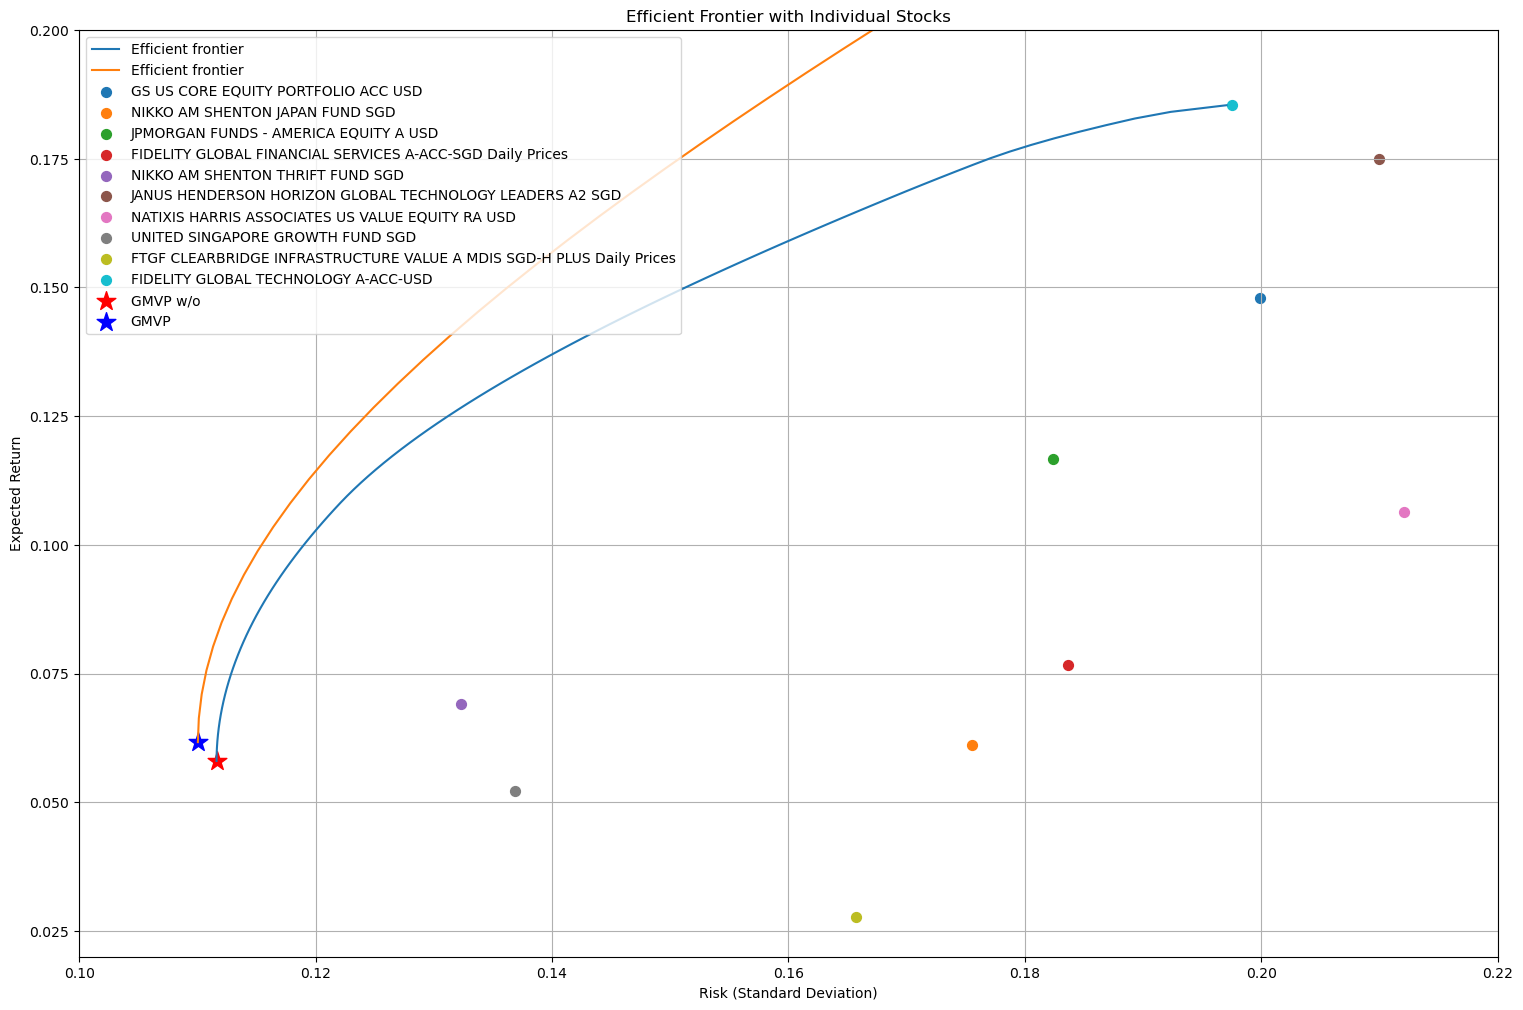

In [24]:
# graph without short sale

# initialize efficient frontier
ef_wo = EfficientFrontier(avgret_annualized, varcov_annualized_array)

# calculate GMPV
ef_wo.min_volatility()
gmpv_weights_wo = ef_wo.clean_weights()
gmpv_return_wo, gmpv_volatility_wo, _ = ef_wo.portfolio_performance()
print("GMVP without short sales:")
print(f"weights: {gmpv_weights_wo}")
print(f"return: {gmpv_return_wo}")
print(f"volatility: {gmpv_volatility_wo}\n")

# set figure size
fig, ax = plt.subplots(figsize=(15, 10))

# draw ef with out short sale
ef_wo = EfficientFrontier(avgret_annualized, varcov_annualized_array,weight_bounds=(0,1))
plotting.plot_efficient_frontier(ef_wo, ax=ax, show_assets=False)

# draw ef with short sale
# initialize efficient frontier
ef_w = EfficientFrontier(avgret_annualized, varcov_annualized_array,weight_bounds=(None,None))
plotting.plot_efficient_frontier(ef_w, ax=ax, show_assets=False)

# draw fund points
column_names = returns_df.columns.tolist()
for i, fund in enumerate(column_names):
    ax.scatter(varcov_annualized_array[i, i] ** 0.5, avgret_annualized[i], label=fund, s=50, marker='o')

# draw GMVP without short sale
ax.scatter(gmpv_volatility_wo, gmpv_return_wo, color="red", marker="*", label="GMVP w/o", s=200)

# draw GMVP with short sale
ax.scatter(gmpv_volatility_w, gmpv_return_w, color='blue', label='GMVP',marker='*', s=200)

# add title and labels
ax.set_title('Efficient Frontier with Individual Stocks')
ax.set_xlabel('Risk (Standard Deviation)')
ax.set_ylabel('Expected Return')
ax.set_xlim(0.1, 0.22) 
ax.set_ylim(0.02, 0.2) 
ax.legend(loc='upper left')
ax.grid(True)
plt.savefig('Efficient Frontier with Individual Stocks.pdf', format='pdf')
plt.show()

In [18]:
# ==== calculate the optimal portfolio and print the JSON ====
from pypfopt.efficient_frontier import EfficientFrontier
import json, textwrap

RISK_FREE_RATE = 0.025   # 2.5% risk-free rate

ef_w = EfficientFrontier(avgret_annualized, varcov_annualized,
                       weight_bounds=(None, None))
ef_w.max_sharpe(risk_free_rate=RISK_FREE_RATE)
weights_mkt = ef_w.clean_weights()
E_rm, sigma_m, _ = ef_w.portfolio_performance(risk_free_rate=RISK_FREE_RATE)

market_json = {
    "R_f": RISK_FREE_RATE,
    "E_rm": E_rm,
    "sigma_m": sigma_m,
    "weights_market": weights_mkt
}
print("Optimal Portfolio with short-sale:")
print(textwrap.indent(json.dumps(market_json, indent=2), ">>> "))

Optimal Portfolio with short-sale:
>>> {
>>>   "R_f": 0.025,
>>>   "E_rm": 0.3107265483510059,
>>>   "sigma_m": 0.2546139112923105,
>>>   "weights_market": {
>>>     "GS US CORE EQUITY PORTFOLIO ACC USD": 1.0,
>>>     "NIKKO AM SHENTON JAPAN FUND SGD": 0.11667,
>>>     "JPMORGAN FUNDS - AMERICA EQUITY A USD": -0.10754,
>>>     "FIDELITY GLOBAL FINANCIAL SERVICES A-ACC-SGD Daily Prices": -0.53677,
>>>     "NIKKO AM SHENTON THRIFT FUND SGD": 1.0,
>>>     "JANUS HENDERSON HORIZON GLOBAL TECHNOLOGY LEADERS A2 SGD": 0.32423,
>>>     "NATIXIS HARRIS ASSOCIATES US VALUE EQUITY RA USD": -0.4219,
>>>     "UNITED SINGAPORE GROWTH FUND SGD": -0.77274,
>>>     "FTGF CLEARBRIDGE INFRASTRUCTURE VALUE A MDIS SGD-H PLUS Daily Prices": -0.60194,
>>>     "FIDELITY GLOBAL TECHNOLOGY A-ACC-USD": 1.0
>>>   }
>>> }


In [19]:

RISK_FREE_RATE = 0.025   # 2.5% risk-free rate

ef_wo = EfficientFrontier(avgret_annualized, varcov_annualized)
ef_wo.max_sharpe(risk_free_rate=RISK_FREE_RATE)
weights_mkt = ef_wo.clean_weights()
E_rm, sigma_m, _ = ef_wo.portfolio_performance(risk_free_rate=RISK_FREE_RATE)

market_json = {
    "R_f": RISK_FREE_RATE,
    "E_rm": E_rm,
    "sigma_m": sigma_m,
    "weights_market": weights_mkt
}
print("Optimal Portfolio without short-sale:")
print(textwrap.indent(json.dumps(market_json, indent=2), ">>> "))

Optimal Portfolio without short-sale:
>>> {
>>>   "R_f": 0.025,
>>>   "E_rm": 0.1748614659499546,
>>>   "sigma_m": 0.17681000084665968,
>>>   "weights_market": {
>>>     "GS US CORE EQUITY PORTFOLIO ACC USD": 0.20359,
>>>     "NIKKO AM SHENTON JAPAN FUND SGD": 0.0,
>>>     "JPMORGAN FUNDS - AMERICA EQUITY A USD": 0.0,
>>>     "FIDELITY GLOBAL FINANCIAL SERVICES A-ACC-SGD Daily Prices": 0.0,
>>>     "NIKKO AM SHENTON THRIFT FUND SGD": 0.0,
>>>     "JANUS HENDERSON HORIZON GLOBAL TECHNOLOGY LEADERS A2 SGD": 0.28056,
>>>     "NATIXIS HARRIS ASSOCIATES US VALUE EQUITY RA USD": 0.0,
>>>     "UNITED SINGAPORE GROWTH FUND SGD": 0.0,
>>>     "FTGF CLEARBRIDGE INFRASTRUCTURE VALUE A MDIS SGD-H PLUS Daily Prices": 0.0,
>>>     "FIDELITY GLOBAL TECHNOLOGY A-ACC-USD": 0.51585
>>>   }
>>> }
